<a href="https://colab.research.google.com/github/Eve113/AnalisisDeDatosEPR1/blob/main/AnalisisDeTiendasAluraStoreEPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Tiendas Alura Store
Este proyecto tiene como objetivo ayudar al Sr. Juan a decidir cuál de las 4 tiendas de la cadena Alura Store debería vender, basándose en datos de ventas, rendimiento y reseñas.

Autor: Evelyn Pareja Ríos  
Fecha: Abril 2025

## Importación de datos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Llamada del data frame
tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# Columna para identificar la tienda de la que proviene el producto

tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unimos todos los datos en un solo DataFrame para mejor comprensión

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Llamada del data frame
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


### Análisis de facturación

In [ ]:
import matplotlib.pyplot as plt
# Para mayor entendimiento a la persona que vea la tabla y dar claridad vamos a crear una nueva columna que se llame ingresos suponiendo que los ingresos son iguales al precio del producto
df["ingresos"] = df["Precio"]

In [ ]:
# Una vez creada la columna "ingresos" procedemos agrupar por tienda y sumar los ingresos reales
ingresos_totales = df.groupby("Tienda")["ingresos"].sum().sort_values(ascending=False)

# mapear esos ingresos al DataFrame original
df["Ingresos totales por tienda"] = df["Tienda"].map(ingresos_totales)

# Muestra la tabla con los ingresos de cada tienda
df[["Tienda", "Ingresos totales por tienda"]].drop_duplicates()


,Tienda,Ingresos totales por tienda
0,Tienda 1,1.150880e+09
2359,Tienda 2,1.116344e+09
4718,Tienda 3,1.098020e+09
7077,Tienda 4,1.038376e+09


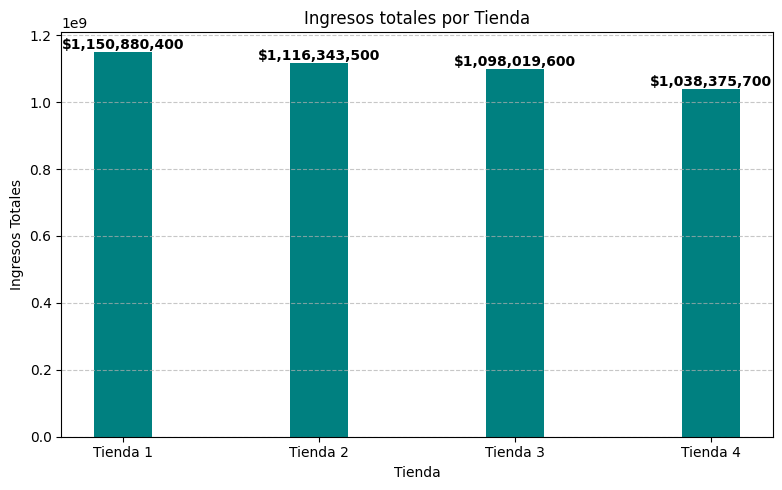


La tienda con más ingresos es la Tienda 1

La tienda con menos ingresos es la Tienda 4


In [ ]:
import matplotlib.pyplot as plt

# Creación de la tabla ingresos_resumen
ingresos_resumen = df[["Tienda", "Ingresos totales por tienda"]].drop_duplicates()

# Gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(ingresos_resumen["Tienda"], ingresos_resumen["Ingresos totales por tienda"], color='#008080', width=0.3)
plt.title("Ingresos totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos Totales")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de cada barra
for i, valor in enumerate(ingresos_resumen["Ingresos totales por tienda"]):
    plt.text(i, valor, f'${valor:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Mensaje con la tienda con más ingresos
tienda_mas_ingresos = ingresos_resumen.loc[ingresos_resumen["Ingresos totales por tienda"].idxmax(), "Tienda"]
print(f'\nLa tienda con más ingresos es la {tienda_mas_ingresos}')

# Mensaje con la tienda con menos ingresos
tienda_menos_ingresos = ingresos_resumen.loc[ingresos_resumen["Ingresos totales por tienda"].idxmin(), "Tienda"]
print(f'\nLa tienda con menos ingresos es la {tienda_menos_ingresos}')

### Ventas por categoría

In [ ]:
# Agrupamos por tienda y categoria del producto, adémas de contar la cantidad de productos vendidos
ventas_por_categoria = df.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad de Ventas")

# Llamada del data frame
ventas_por_categoria.head()

,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182


In [ ]:
# Ordenamos por tienda y cantidad de ventas (de mayor a menor)
ventas_mayor_menor= ventas_por_categoria.sort_values(by=["Tienda","Cantidad de Ventas"], ascending=[True, False])

# Creamos la columna Ranking por tienda
ventas_mayor_menor["Ranking"]= ventas_mayor_menor.groupby("Tienda") ["Cantidad de Ventas"].rank(method="first", ascending=False).astype(int)

# Filtramos solo el top 5 de cada tienda
Top_Tienda = ventas_mayor_menor[ventas_mayor_menor["Ranking"]<=5]

# Llamada del data frame
Top_Tienda

,Tienda,Categoría del Producto,Cantidad de Ventas,Ranking
7,Tienda 1,Muebles,465,1
3,Tienda 1,Electrónicos,448,2
5,Tienda 1,Juguetes,324,3
2,Tienda 1,Electrodomésticos,312,4
1,Tienda 1,Deportes y diversión,284,5
15,Tienda 2,Muebles,442,1
11,Tienda 2,Electrónicos,422,2
13,Tienda 2,Juguetes,313,3
10,Tienda 2,Electrodomésticos,305,4
9,Tienda 2,Deportes y diversión,275,5


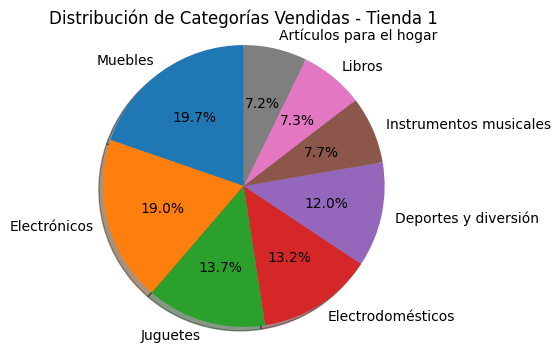

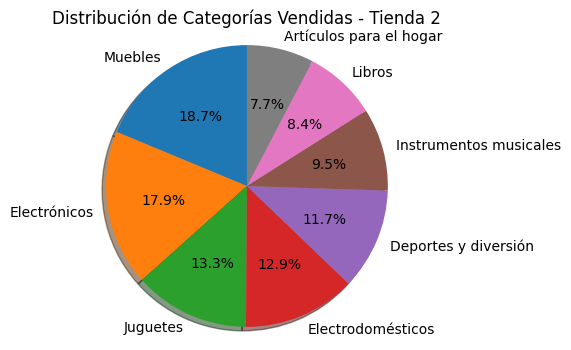

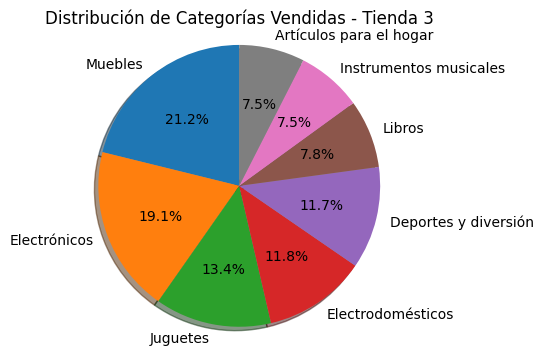

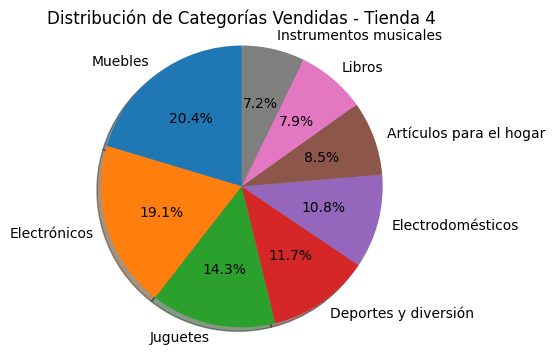


La categoría más vendida es Muebles y la categoría menos vendida es Artículos para el hogar


In [ ]:
import matplotlib.pyplot as plt

# Se creará un gráfico por tienda
tiendas = df["Tienda"].unique()
for tienda in tiendas:
    data_tienda = df[df["Tienda"] == tienda]

    # Contar cuántos productos se vendieron por categoría
    categorias = data_tienda["Categoría del Producto"].value_counts()

    # Creación del gráfico
    plt.figure(figsize=(4, 4))
    plt.pie(categorias, labels=categorias.index, autopct="%1.1f%%", startangle=90, shadow=True)
    plt.title(f'Distribución de Categorías Vendidas - {tienda}')
    plt.axis("equal")  # Para que el gráfico sea circular
    plt.show()
# Categoría más y menos vendida entre todas las tiendas
categoria_total=df["Categoría del Producto"].value_counts()
categoria_mas_vendida = categoria_total.idxmax()
categoria_menos_vendida = categoria_total.idxmin()

print(f'\nLa categoría más vendida es {categoria_mas_vendida} y la categoría menos vendida es {categoria_menos_vendida}')


### Calificación promedio de la tienda

In [ ]:
# Agrupar por tienda y calcular el promedio de la columna Calificación
calificaciones_promedio = df.groupby("Tienda")["Calificación"].mean().reset_index()

# Renombramos la columna para que sea más clara
calificaciones_promedio.rename(columns={"Calificación": "Calificación Promedio"}, inplace=True)

# Mostramos la tienda con la mejor calificación promedio
tienda_mejor_valorada = calificaciones_promedio.loc[calificaciones_promedio["Calificación Promedio"].idxmax(), "Tienda"]
print(f'La tienda mejor valorada por los clientes es la {tienda_mejor_valorada}\n ')

# Mostramos la tabla
calificaciones_promedio.sort_values(by='Calificación Promedio', ascending=False)


La tienda mejor valorada por los clientes es la Tienda 3
 


,Tienda,Calificación Promedio
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


### Productos más y menos vendidos

In [ ]:
# Agrupamos por Tienda y Producto, y contamos la cantidad de ventas
ventas_por_producto = df.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad de Ventas")

# Ordenamos por tienda y cantidad de ventas
ventas_por_producto_ordenado = ventas_por_producto.sort_values(by=["Tienda", "Cantidad de Ventas"], ascending=[True, False])

# Lista para guardar los resultados
resumen_ventas = []

# Iteramos por tienda y extraemos el más y el menos vendido
for tienda in tiendas:
    productos_tienda = ventas_por_producto_ordenado[ventas_por_producto_ordenado["Tienda"] == tienda]

    producto_top = productos_tienda.iloc[0]
    producto_menos = productos_tienda.iloc[-1]

    resumen_ventas.append({
        "Tienda": tienda,
        "Producto más vendido": producto_top["Producto"],
        "Ventas del producto más vendido": producto_top["Cantidad de Ventas"],
        "Producto menos vendido": producto_menos["Producto"],
        "Ventas del producto menos vendido": producto_menos["Cantidad de Ventas"]
    })

# Convertir lista a DataFrame
tabla_resumen_ventas = pd.DataFrame(resumen_ventas)

# Mostrar tabla
tabla_resumen_ventas

,Tienda,Producto más vendido,Ventas del producto más vendido,Producto menos vendido,Ventas del producto menos vendido
0,Tienda 1,Armario,60,Celular ABXY,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


In [ ]:
# Top 5 productos más y menos vendidos por tienda
df["Ingresos"] = df["Precio"]

# Agrupamos por Tienda y Producto, contamos ventas y sumamos ingresos
ventas_productos = df.groupby(["Tienda", "Producto"]).agg({"Producto": "count","Ingresos": "sum"}).rename(columns={"Producto": "Cantidad de Ventas"}).reset_index()

# Recorremos cada tienda y mostramos top 5 más y menos vendidos
for tienda in df["Tienda"].unique():
    datos_tienda = ventas_productos[ventas_productos["Tienda"] == tienda]
    top5 = datos_tienda.sort_values(by="Cantidad de Ventas", ascending=False).head(5).copy()
    bottom5 = datos_tienda.sort_values(by="Cantidad de Ventas").head(5).copy()

    top5.insert(0, "Ranking", range(1, 6))
    bottom5.insert(0, "Ranking", range(1, 6))

    print(f'\nTop 5 productos MÁS vendidos - {tienda}')
    display(top5[["Ranking", "Producto", "Cantidad de Ventas", "Ingresos"]])

    print(f'\nTop 5 productos MENOS vendidos - {tienda}')
    display(bottom5[["Ranking", "Producto", "Cantidad de Ventas", "Ingresos"]])


Top 5 productos MÁS vendidos - Tienda 1


,Ranking,Producto,Cantidad de Ventas,Ingresos
1,1,Armario,60,29462300.0
48,2,TV LED UHD 4K,60,142150200.0
33,3,Microondas,60,34761500.0
40,4,Secadora de ropa,58,59062400.0
32,5,Mesa de noche,56,15679600.0



Top 5 productos MENOS vendidos - Tienda 1


,Ranking,Producto,Cantidad de Ventas,Ingresos
4,1,Auriculares con micrófono,33,4730800.0
13,2,Celular ABXY,33,32651000.0
37,3,Olla de presión,35,2629300.0
38,4,Pandereta,36,2238900.0
14,5,Ciencia de datos con Python,39,2063600.0



Top 5 productos MÁS vendidos - Tienda 2


,Ranking,Producto,Cantidad de Ventas,Ingresos
75,1,Iniciando en programación,65,3127800.0
84,2,Microondas,62,36192000.0
58,3,Batería,61,46175300.0
89,4,Pandereta,58,3725100.0
72,5,Guitarra acústica,58,18648400.0



Top 5 productos MENOS vendidos - Tienda 2


,Ranking,Producto,Cantidad de Ventas,Ingresos
77,1,Juego de mesa,32,5811900.0
74,2,Impresora,34,10385300.0
82,3,Mesa de comedor,34,8637500.0
95,4,Sillón,35,8413500.0
54,5,Auriculares,37,3569600.0



Top 5 productos MÁS vendidos - Tienda 3


,Ranking,Producto,Cantidad de Ventas,Ingresos
129,1,Kit de bancas,57,16699800.0
133,2,Mesa de comedor,56,14326100.0
113,3,Cama king,56,38834700.0
143,4,Set de ollas,55,8696500.0
134,5,Mesa de noche,55,15365500.0



Top 5 productos MENOS vendidos - Tienda 3


,Ranking,Producto,Cantidad de Ventas,Ingresos
111,1,Bloques de construcción,35,1237200.0
144,2,Set de vasos,36,1210700.0
136,3,Mochila,36,3547000.0
135,4,Microondas,36,19153600.0
152,5,Vaso térmico,38,1725600.0



Top 5 productos MÁS vendidos - Tienda 4


,Ranking,Producto,Cantidad de Ventas,Ingresos
163,1,Cama box,62,32946300.0
168,2,Cubertería,59,2649300.0
164,3,Cama king,56,37555400.0
171,4,Dashboards con Power BI,56,1990600.0
165,5,Carrito de control remoto,55,4014200.0



Top 5 productos MENOS vendidos - Tienda 4


,Ranking,Producto,Cantidad de Ventas,Ingresos
175,1,Guitarra eléctrica,33,25823100.0
154,2,Armario,34,16421400.0
174,3,Guitarra acústica,37,11257100.0
167,4,Ciencia de datos con Python,38,2108800.0
181,5,Lavadora de ropa,38,52463600.0


### Envío promedio por tienda

In [ ]:
# Calculamos el costo de envío promedio por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().reset_index()

# Renombra columna para mejor presentación
envio_promedio = envio_promedio.rename(columns={"Costo de envío": "Costo de Envío Promedio"})

# Mostrar tabla
display(envio_promedio)

# Identificar tienda con envío más barato y más caro
tienda_mas_barata = envio_promedio.loc[envio_promedio["Costo de Envío Promedio"].idxmin(), "Tienda"]
tienda_mas_cara = envio_promedio.loc[envio_promedio["Costo de Envío Promedio"].idxmax(), "Tienda"]

print(f'\nLa tienda con el envío más barato es de la {tienda_mas_barata} \n\nLa tienda con el envío más caro esde la {tienda_mas_cara}')

,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167



La tienda con el envío más barato es de la Tienda 4 

La tienda con el envío más caro esde la Tienda 1


### Análisis del desempeño geográfico

In [ ]:
# Coincidencias geográficas entre tiendas

# Creación de una columna combinada con latitud y longitud para facilitar la comparación
df["coordenadas"] = list(zip(df["lat"], df["lon"]))

# Creación de una tabla cruzada que indique las coordenadas de cada tienda
coordenadas_por_tienda = df.groupby("Tienda")["coordenadas"].apply(set)

# Crear matriz de coincidencias entre tiendas
tiendas = coordenadas_por_tienda.index.tolist()
coincidencias = pd.DataFrame(index=tiendas, columns=tiendas)

for t1 in tiendas:
    for t2 in tiendas:
        interseccion = coordenadas_por_tienda[t1].intersection(coordenadas_por_tienda[t2])
        coincidencias.loc[t1, t2] = len(interseccion)

# Mostrar la tabla
print(f'Tabla de coincidencias geográficas (lat/lon) entre tiendas \n')
coincidencias

Tabla de coincidencias geográficas (lat/lon) entre tiendas 



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Tienda 1,19,19,19,19
Tienda 2,19,19,19,19
Tienda 3,19,19,19,19
Tienda 4,19,19,19,19


Notese que en la tabla anterior, existe un alto número de coordenadas compartidas entre tiendas, lo que implica que muchas ventas se realizan en las mismas ubicaciones. Lo cual al graficarlas en un solo gráfico de dispersión los puntos se superpondrían, dificultando así la identificación de patrones por tienda. Por lo tanto se llega a la decisión de el uso de disperción por separados como se podrá observar a continuación, además de enfocarnos en el uso de mapas de calor.



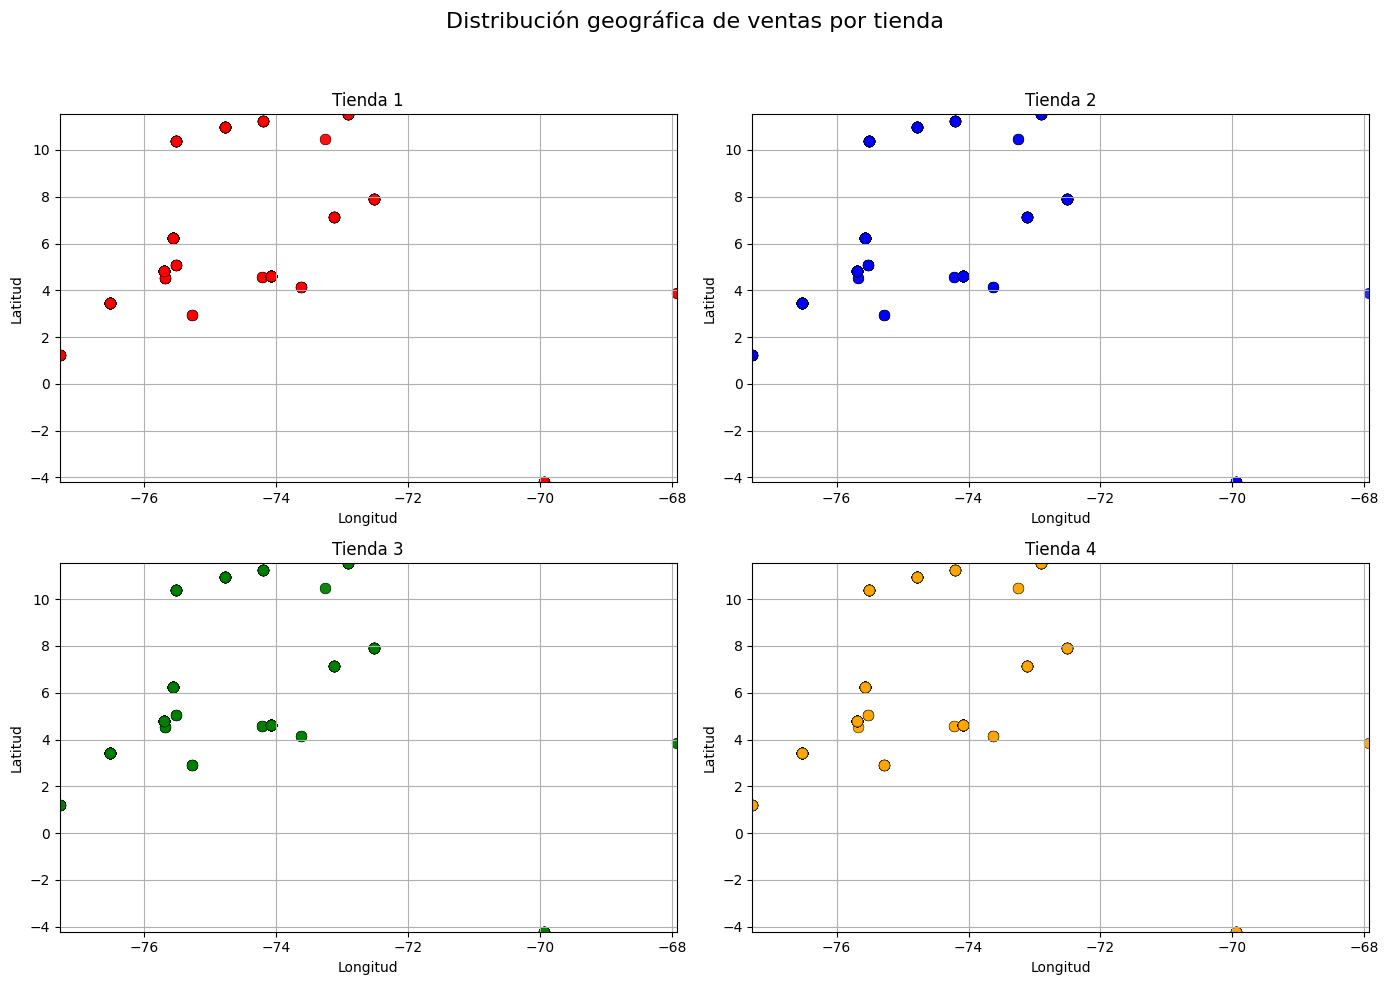

In [ ]:
import matplotlib.pyplot as plt

# Obtener los rangos comunes de latitud y longitud
lat_min, lat_max = df["lat"].min(), df["lat"].max()
lon_min, lon_max = df["lon"].min(), df["lon"].max()

# Configurar la figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribución geográfica de ventas por tienda", fontsize=16)

colores = {"Tienda 1": "red", "Tienda 2": "blue", "Tienda 3": "green", "Tienda 4": "orange"}
tiendas = df["Tienda"].unique()
posiciones = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Graficar cada tienda en su subplot
for tienda, pos in zip(tiendas, posiciones):
    datos = df[df["Tienda"] == tienda]
    ax = axs[pos[0]][pos[1]]
    ax.scatter(
        datos["lon"], datos["lat"],
        color=colores[tienda],
        alpha=0.6,
        edgecolor='black',
        linewidth=0.3,
        s=60
    )
    ax.set_title(tienda)
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Headmap general
import folium
from folium.plugins import HeatMap

# Creamos un mapa base centrado en las coordenadas promedio
centro_mapa = [df['lat'].mean(), df['lon'].mean()]
mapa_calor = folium.Map(location=centro_mapa, zoom_start=12)

# Extraemos las coordenadas de ventas
coordenadas = df[['lat', 'lon']].values.tolist()

# Agregamos capa de mapa de calor
HeatMap(coordenadas, radius=10, blur=15).add_to(mapa_calor)

# Mostrar mapa
mapa_calor

In [ ]:
# Mapa de tiendas dominantes por zona

import folium
import numpy as np
from folium.plugins import MarkerCluster

# Tamaño de las celdas
grid_size = 0.2

# Creamos las columnas para agrupar en celdas
df["lat_grid"] = (df["lat"] // grid_size) * grid_size
df["lon_grid"] = (df["lon"] // grid_size) * grid_size

# Contamos ventas por tienda por celda
ventas_por_celda = df.groupby(["lat_grid", "lon_grid", "Tienda"]).size().reset_index(name="Ventas")

# Elegimos la tienda con más ventas por celda
top_por_zona = ventas_por_celda.sort_values("Ventas", ascending=False).drop_duplicates(subset=["lat_grid", "lon_grid"])


# Promedio de calificaciones y total de ingresos por tienda y celda
info_extra = df.copy()
info_extra["Ingresos"] = info_extra["Precio"]

resumen_info = info_extra.groupby(["lat_grid", "lon_grid", "Tienda"]).agg({
    "Ingresos": "sum",
    "Calificación": "mean",
    "Producto": lambda x: x.mode()[0] if not x.mode().empty else "Desconocido"
}).reset_index()

# Unimos la informacón extra con la tabla de top tiendas por celda
top_completo = pd.merge(top_por_zona, resumen_info, on=["lat_grid", "lon_grid", "Tienda"])

# Creamos un mapa base
mapa = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=6)

# Colores para cada tienda
colores = {"Tienda 1": "red", "Tienda 2": "blue", "Tienda 3": "green", "Tienda 4": "orange"}

# Agrupamos los marcadores
cluster = MarkerCluster().add_to(mapa)

# Agregamos cada punto con popup detallado
for _, row in top_completo.iterrows():
    lat_centro = row["lat_grid"] + grid_size / 2
    lon_centro = row["lon_grid"] + grid_size / 2
    popup_text = (
        f"<b>Tienda:</b> {row['Tienda']}<br>"
        f"<b>Producto más vendido:</b> {row['Producto']}<br>"
        f"<b>Ingresos totales:</b> ${row['Ingresos']:.2f}<br>"
        f"<b>Calificación promedio:</b> {row['Calificación']:.1f}<br>"
        f"<b>Ventas en zona:</b> {row['Ventas']}"
    )
    folium.CircleMarker(
        location=[lat_centro, lon_centro],
        radius=6,
        color=colores[row["Tienda"]],
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(cluster)

# Mostrar mapa
mapa

In [ ]:
# Crear función para evaluar rendimiento
def evaluar_rendimiento(df_tienda):
    mediana_ingresos = df_tienda["Ingresos"].median()
    rendimiento_superior = (df_tienda["Ingresos"] > mediana_ingresos).sum()
    rendimiento_inferior = (df_tienda["Ingresos"] <= mediana_ingresos).sum()
    tasa_superior = (rendimiento_superior / len(df_tienda)) * 100
    return rendimiento_superior, rendimiento_inferior, tasa_superior

# Construir resumen
resumen = []

for tienda in df["Tienda"].unique():
    df_tienda = df[df["Tienda"] == tienda]
    superior, inferior, tasa = evaluar_rendimiento(df_tienda)
    resumen.append({
        "Tienda": tienda,
        "Rendimiento Superior": superior,
        "Rendimiento Inferior": inferior,
        "Tasa de Zonas Superiores (%)": round(tasa, 2)
    })

# se crea el DataFrame
resumen_df = pd.DataFrame(resumen)

# Mostrar la tabla con el resumen de los rendimientos de cada tienda
resumen_df

,Tienda,Rendimiento Superior,Rendimiento Inferior,Tasa de Zonas Superiores (%)
0,Tienda 1,1179,1180,49.98
1,Tienda 2,1179,1180,49.98
2,Tienda 3,1179,1180,49.98
3,Tienda 4,1179,1179,50.00


Con esta tabla podemos observar que la Tienda 4 a pesar de tener una tasa del 50% de zonas con rendimiento superior, este porcentaje no es significativa, además con la siguiente tabla podemos notar que a pesar de esta "ventaja", sigue siendo la tienda con menos zonas dominadas.

In [ ]:
# Contaremos cuantas zonas dominadas tiene cada tienda
dominio_por_tienda = top_completo["Tienda"].value_counts().reset_index()
dominio_por_tienda.columns = ["Tienda", "Cantidad de Zonas Dominadas"]

# Mostramos la tabla
dominio_por_tienda

,Tienda,Cantidad de Zonas Dominadas
0,Tienda 2,5
1,Tienda 1,5
2,Tienda 3,5
3,Tienda 4,4


# **Análisis y Recomendaciones Sobre la Venta de Tiendas de Alura Store**



Tras el análisis detallado de los indicadores clave de desempeño de las tiendas de la cadena Alura Store, se presentan las siguientes conclusiones y recomendaciones para el Sr.Juan respecto a la venta de una de las tiendas.

## **Análisis de desempeño**

### **Ingresos**
La tienda 1 registra el mayor ingreso total, mientras que la tienda 4 presenta el menor ingreso, con una diferencia entre ambas de $112.504.700.

### **Ventas por categoría**
El producto más vendido en toda la cadena corresponde a **muebles**, siendo la Tienda 3 a que lidera esta categoría en volumen de ventas, seguida de la Tienda 4 y la Tienda 1.

### **Satisfacción del cliente**
La Tienda 3 es la mejor valorada en promedio por los cliente, superando a la Tienda 4 y la Tienda 1,  las cuales presentan laa calificaciones más bajas, siendo la Tienda 1 la de peor valoración en promedio.

### **Costos de envío**
La tienda 4 ofrece los costos de envío más económicos, mientras que la Tienda 1 presenta los costos de envío más elevados.

### **Dominancia Geográfica**
La Tienda 4 posee la menor cantidad de zonas dominantes, lo cual limita su expansión y presencia en el mercado en comparación con las demás tiendas.

### **Rendimiento Geográfico**
La tasa de zonas con rendimiento superior es del 49.98% para la Tienda 1, Tienda 2 y Tienda 3, mientras que la Tienda 4 presenta una tasa del 50%, indicando que, aunque tiene una ligera ventaja en rendimiento geográfico, esta diferencia no es significativa al compararla con otras tiendas.

## **Recomendación**
Con base a lo analizado con anterioridad, se recomienda al Sr. Juan que considere vender la Tienda 4.

Esta tienda, además de generar menores ingresos, tiene baja valoración por parte de los clientes y escasa dominancia territorial, lo que podría dificultar su crecimiento futuro a pesar de su ventaja en costos de envío y rendimiento geográfico similar al de otras tiendas.

Se recomienda concentrar esfuerzos en las tiendas de mejor desempeño (especialmente la Tienda 3), lo cual permitirá fortalecer la marca Alura Store y maximizar el potencial de expansión y rentabilidad.

